# Código Simulação de dados Oxímetro ( - )

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import mysql.connector

def connect_database():
    try:
        connection = mysql.connector.connect(
            host="localhost",
            user ="root",
            password="L00senha@",
            database="oximetro"
        )
        print("Conexão com o banco de dados realizada com sucesso")
        return connection
    except mysql.connector.Error as error:
        print("Erro ao conectar com o banco de dados {}".format(error))


def insert_data(connection, time_point, heart_rate, oxygen_lvl, diagnosis):
    try:
        cursor = connection.cursor()
        sql_query = "INSERT INTO sensor_data (time_point, heart_rate, oxygen_levels, diagnosis) VALUES (%s, %s, %s, %s)"
        data_values = (time_point, heart_rate, oxygen_lvl, diagnosis)
        cursor.execute(sql_query, data_values)
        connection.commit()
        print("Dados inseridos com sucesso no banco de dados")
    except mysql.connector.Error as error:
        print("Erro ao inserir dados no banco de dados:{}".format(error))




def generate_data():
    time_points = np.linspace(0, 10, 100)  # Tempo de simulação de 0 a 10 segundos
    heart_rate = 60 + 40 * np.sqrt(time_points) + np.random.normal(0, 5, size=len(time_points))
    oxygen_levels = 95 + np.random.normal(0, 2, size=len(time_points))
    return time_points, heart_rate, oxygen_levels

def simulate_sensor(connection):
    time_points, heart_rate, oxygen_levels = generate_data()
    for t, hr, ox in zip(time_points, heart_rate, oxygen_levels):
        diag = "NORMAL"  # Inicialmente assume que está normal
        if ox < 95:
            if ox < 91:
                diag = "HIPOXIA MODERADA"
            else:
                diag = "HIPOXIA LEVE"
        elif ox < 80:
            diag = "HIPOXIA SEVERA"

        print(f"oximetria: {ox:.1f}, heartRate: {hr:.0f}, diag: {diag}")

        insert_data(connection, t, hr, ox, diag)

        time.sleep(0.1)


    # Plotar gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, heart_rate, label='Frequência Cardíaca', color='blue')
    plt.plot(time_points, oxygen_levels, label='Nível de Oxigênio', color='red')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Valor')
    plt.title('Simulação de Frequência Cardíaca e Oximetria')
    plt.legend()
    plt.grid(True)
    plt.show()

Conexão com o banco de dados realizada com sucesso
oximetria: 95.9, heartRate: 59, diag: NORMAL
Dados inseridos com sucesso no banco de dados
oximetria: 96.4, heartRate: 75, diag: NORMAL
Dados inseridos com sucesso no banco de dados
oximetria: 96.7, heartRate: 84, diag: NORMAL
Dados inseridos com sucesso no banco de dados
oximetria: 95.4, heartRate: 78, diag: NORMAL
Dados inseridos com sucesso no banco de dados
oximetria: 93.5, heartRate: 87, diag: HIPOXIA LEVE
Dados inseridos com sucesso no banco de dados
oximetria: 94.8, heartRate: 87, diag: HIPOXIA LEVE
Dados inseridos com sucesso no banco de dados
oximetria: 95.3, heartRate: 95, diag: NORMAL
Dados inseridos com sucesso no banco de dados
oximetria: 91.6, heartRate: 101, diag: HIPOXIA LEVE
Dados inseridos com sucesso no banco de dados
oximetria: 97.1, heartRate: 98, diag: NORMAL
Dados inseridos com sucesso no banco de dados
oximetria: 96.0, heartRate: 95, diag: NORMAL
Dados inseridos com sucesso no banco de dados
oximetria: 95.1, hea

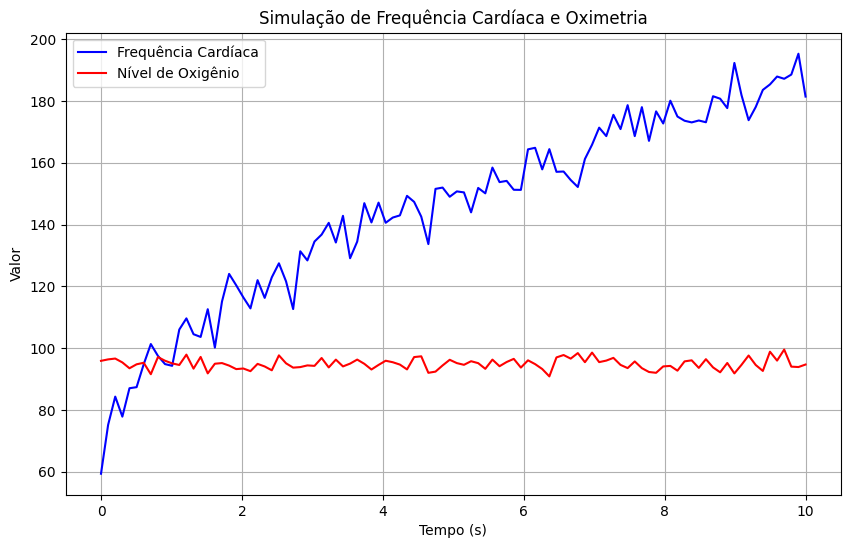

In [3]:
if __name__ == "__main__":
    connection = connect_database()
    if connection:
        simulate_sensor(connection)
        connection.close()